In [979]:
# Importing necessary packages
import os
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [980]:
DATA_FOLDER = './'
scaled_data = pd.read_csv(os.path.join(DATA_FOLDER, 'Houseprice_data_scaled.csv'))
full_data = pd.read_csv(os.path.join(DATA_FOLDER, 'Original_Data.csv'))

In [981]:
lot_frontage = full_data[['LotFrontage']]
lot_shape = full_data[['LotShape']]

### Method 1: Replacing NaN Values with the Mean

In [982]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(lot_frontage)
lot_frontage = imp.transform(lot_frontage)
print(type(lot_frontage))
lot_frontage = pd.DataFrame(lot_frontage)
print(lot_frontage.head(10))

<class 'numpy.ndarray'>
           0
0  65.000000
1  80.000000
2  68.000000
3  60.000000
4  84.000000
5  85.000000
6  75.000000
7  69.083815
8  51.000000
9  50.000000


In [983]:
lot_frontage = (lot_frontage - lot_frontage.mean())/lot_frontage.std()

print("Size of the dataset (row, col): ", lot_frontage.shape)
print("\nFirst 5 rows\n", lot_frontage.head(n=10))

Size of the dataset (row, col):  (2908, 1)

First 5 rows
           0
0 -0.197213
1  0.527158
2 -0.052339
3 -0.438670
4  0.720324
5  0.768615
6  0.285701
7  0.000000
8 -0.873293
9 -0.921585


In [984]:
scaled_data['LotFrontage'] = lot_frontage


In [985]:
train = scaled_data.iloc[:1800] 
val = scaled_data.iloc[1800:2400]

In [986]:
#train = train.dropna()
#val = val.dropna()

In [987]:
# Creating the "X" and "y" variables. We drop sale price from "X"
X_train, X_val = train.drop('Sale Price', axis=1), val.drop('Sale Price', axis=1)
y_train, y_val = train[['Sale Price']], val[['Sale Price']] 

Linear Regression

In [988]:
# Importing models
from sklearn.linear_model import LinearRegression

In [989]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Method 1 Linear Regression

In [990]:
# Create dataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-0.000759
LotArea,0.071456
OverallQual,0.21279
OverallCond,0.097333
YearBuilt,0.16581
YearRemodAdd,0.027193
BsmtFinSF1,0.09174
BsmtUnfSF,-0.033845
TotalBsmtSF,0.141118


In [991]:
pred=lr.predict(X_val)
print("MSE: " + str(mse(y_val, pred)) + "\n")
print("R2: " + str(r2(y_val, pred)))


MSE: 0.11325046944616939

R2: 0.8989913310568435


Ridge Regression

In [992]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.05*1800)
ridge.fit(X_train, y_train)

coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(ridge.intercept_) + list(ridge.coef_[0])
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-0.000726
LotArea,0.067372
OverallQual,0.202841
OverallCond,0.084679
YearBuilt,0.126154
YearRemodAdd,0.039521
BsmtFinSF1,0.102681
BsmtUnfSF,-0.020481
TotalBsmtSF,0.118618


In [993]:
# The alpha used by Python's ridge should be the lambda in Hull's book times the number of observations
alphas=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses=[]
r2s = []
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    pred=ridge.predict(X_val)
    r2s.append(r2(y_val, pred))
    mses.append(mse(y_val,pred))

for i in mses:
    print("MSE: " + str(i))

print("\n")

for i in r2s:
    print("R2: " + str(i))

MSE: 0.11326374932587416
MSE: 0.11334893643245024
MSE: 0.11349100794544872
MSE: 0.11367624830307217
MSE: 0.1138950990202756
MSE: 0.11454912801315573
MSE: 0.11530911864681812
MSE: 0.11889333709447229
MSE: 0.127101404865319


R2: 0.898979486664681
R2: 0.8989035078516266
R2: 0.8987767935475457
R2: 0.8986115767316719
R2: 0.8984163826653685
R2: 0.8978330508845457
R2: 0.8971552113780878
R2: 0.8939584287389559
R2: 0.8866376114021013


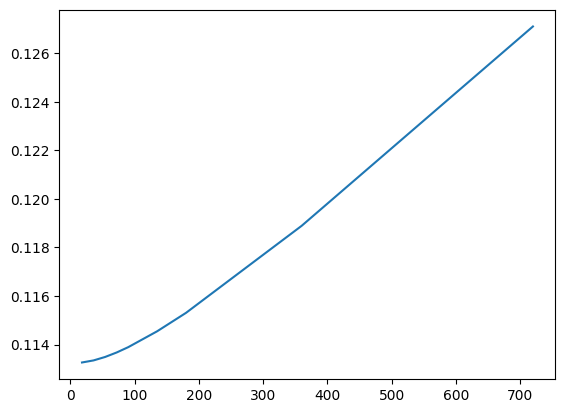

In [994]:
plt.plot(alphas, mses)

Lasso Regression

In [995]:
# Import Lasso
from sklearn.linear_model import Lasso

In [996]:
# Here we produce results for alpha=0.05 which corresponds to lambda=0.1 in Hull's book
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

Lasso(alpha=0.05)

In [997]:
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-0.000182
LotArea,0.041762
OverallQual,0.29864
OverallCond,0.0
YearBuilt,0.052163
YearRemodAdd,0.065166
BsmtFinSF1,0.116103
BsmtUnfSF,-0.0
TotalBsmtSF,0.103082


In [998]:
# We now consider different lambda values. The alphas are half the lambdas
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses=[]
r2s = []

for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred=lasso.predict(X_val)
    r2s.append(r2(y_val, pred))
    mses.append(mse(y_val,pred))

for i in mses:
    print("MSE: " + str(i))

print("\n")

for i in r2s:
    print("R2: " + str(i))

MSE: 0.11282842282636006
MSE: 0.11280498892952119
MSE: 0.11407741008002939
MSE: 0.1164594920663704
MSE: 0.11970129640679068
MSE: 0.12976526800398377
MSE: 0.13874095621169108


R2: 0.8993677565807938
R2: 0.8993886573924145
R2: 0.8982537785051438
R2: 0.8961291874819857
R2: 0.8932378057243529
R2: 0.8842616983379071
R2: 0.8762562364343675


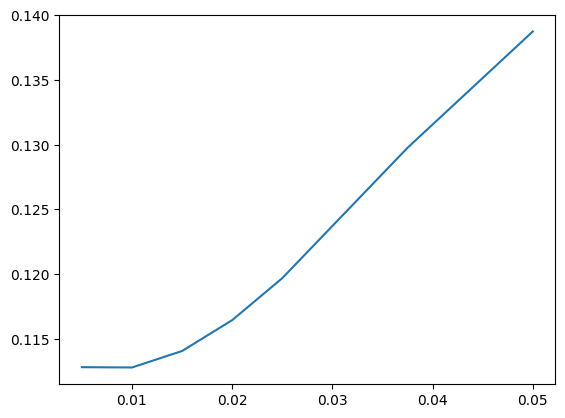

In [999]:
plt.plot(alphas, mses)

Resetting the Data

In [1000]:
lot_frontage = full_data[['LotFrontage']]

lot_frontage = (lot_frontage - lot_frontage.mean())/lot_frontage.std()

print("Size of the dataset (row, col): ", lot_frontage.shape)
print("\nFirst 5 rows\n", lot_frontage.head(n=10))

scaled_data['LotFrontage'] = lot_frontage

Size of the dataset (row, col):  (2908, 1)

First 5 rows
    LotFrontage
0    -0.179975
1     0.481078
2    -0.047764
3    -0.400326
4     0.657359
5     0.701429
6     0.260727
7          NaN
8    -0.796957
9    -0.841027


### Method 2: Dropping All NaN Rows

In [1001]:
train = scaled_data.iloc[:1800] 
val = scaled_data.iloc[1800:2400]

In [1002]:
train = train.dropna()
val = val.dropna()

Method 2
Linear Regression

In [1003]:
# Creating the "X" and "y" variables. We drop sale price from "X"
X_train, X_val = train.drop('Sale Price', axis=1), val.drop('Sale Price', axis=1)
y_train, y_val = train[['Sale Price']], val[['Sale Price']] 

lr=LinearRegression()
lr.fit(X_train,y_train)

# Create dataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,0.007969
LotArea,0.110306
OverallQual,0.202575
OverallCond,0.101428
YearBuilt,0.16829
YearRemodAdd,0.024872
BsmtFinSF1,0.091215
BsmtUnfSF,-0.040832
TotalBsmtSF,0.134745


In [1004]:
pred=lr.predict(X_val)
print("MSE: " + str(mse(y_val, pred)) + "\n")
print("R2: " + str(r2(y_val, pred)))

MSE: 0.1100968758098584

R2: 0.9092891343982636


Method 2 Ridge Regression

In [1005]:
train_len = len(train)
print(train_len)

1489


In [1006]:
ridge = Ridge(alpha=0.05*train_len)
ridge.fit(X_train, y_train)

coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(ridge.intercept_) + list(ridge.coef_[0])
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,0.007791
LotArea,0.101954
OverallQual,0.195536
OverallCond,0.086244
YearBuilt,0.128699
YearRemodAdd,0.038837
BsmtFinSF1,0.104663
BsmtUnfSF,-0.025778
TotalBsmtSF,0.115726


In [1007]:
# The alpha used by Python's ridge should be the lambda in Hull's book times the number of observations
alphas=[0.01*train_len, 0.02*train_len, 0.03*train_len, 0.04*train_len, 0.05*train_len, 0.075*train_len,0.1*train_len,0.2*train_len, 0.4*train_len]
mses=[]
r2s = []
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    pred=ridge.predict(X_val)
    r2s.append(r2(y_val, pred))
    mses.append(mse(y_val,pred))

for i in mses:
    print("MSE: " + str(i))

print("\n")

for i in r2s:
    print("R2: " + str(i))

MSE: 0.11010214600492825
MSE: 0.1101886985859681
MSE: 0.11034011715490824
MSE: 0.11054012218203725
MSE: 0.11077735552928727
MSE: 0.11148601139302762
MSE: 0.11230570873169303
MSE: 0.11612654145490613
MSE: 0.12477241731062409


R2: 0.9092847921864328
R2: 0.9092134799036051
R2: 0.9090887233257667
R2: 0.9089239354605152
R2: 0.9087284744892538
R2: 0.9081445997304036
R2: 0.9074692358331556
R2: 0.9043211806218463
R2: 0.8971976825480971


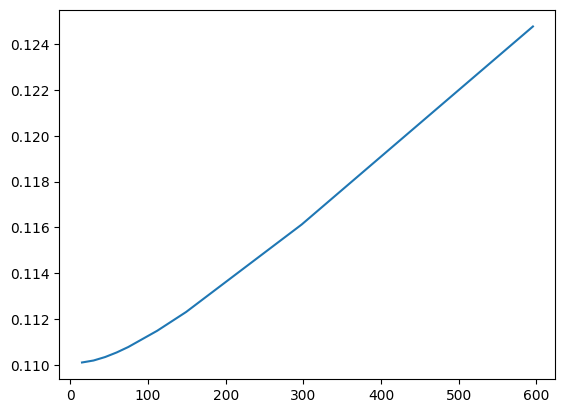

In [1008]:
plt.plot(alphas, mses)

Method Lasso Regression

In [1009]:
# Here we produce results for alpha=0.05 which corresponds to lambda=0.1 in Hull's book
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,0.003777
LotArea,0.057056
OverallQual,0.29067
OverallCond,0.0
YearBuilt,0.05499
YearRemodAdd,0.066431
BsmtFinSF1,0.127222
BsmtUnfSF,-0.0
TotalBsmtSF,0.09984


In [1010]:
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses=[]
r2s = []

for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred=lasso.predict(X_val)
    r2s.append(r2(y_val, pred))
    mses.append(mse(y_val,pred))

for i in mses:
    print("MSE: " + str(i))

print("\n")

for i in r2s:
    print("R2: " + str(i))

MSE: 0.10903367098761702
MSE: 0.10943344957443671
MSE: 0.11083888953378526
MSE: 0.11314018261298649
MSE: 0.11635251830583124
MSE: 0.1260432694210081
MSE: 0.13393882463353277


R2: 0.9101651286444947
R2: 0.9098357436243232
R2: 0.9086777754773981
R2: 0.9067816972673484
R2: 0.9041349940874639
R2: 0.8961506038354929
R2: 0.8896453089080388


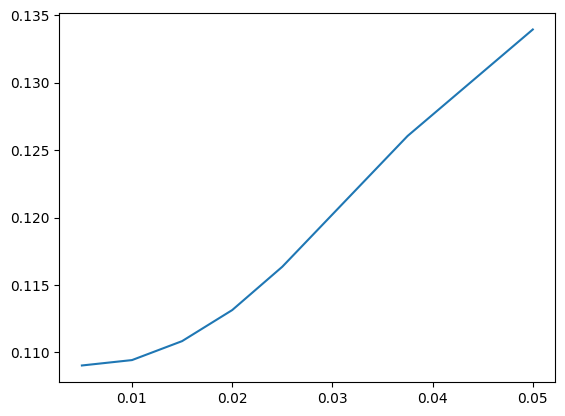

In [1011]:
plt.plot(alphas, mses)

Resetting the Data

In [1012]:
lot_frontage = full_data[['LotFrontage']]

lot_frontage = (lot_frontage - lot_frontage.mean())/lot_frontage.std()

print("Size of the dataset (row, col): ", lot_frontage.shape)
print("\nFirst 5 rows\n", lot_frontage.head(n=10))

Size of the dataset (row, col):  (2908, 1)

First 5 rows
    LotFrontage
0    -0.179975
1     0.481078
2    -0.047764
3    -0.400326
4     0.657359
5     0.701429
6     0.260727
7          NaN
8    -0.796957
9    -0.841027


In [1013]:
print(len(train))

1489


### Method 3: Replacing NaN Values with the Median

In [1014]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(lot_frontage)
lot_frontage = imp.transform(lot_frontage)
lot_frontage = pd.DataFrame(lot_frontage)
print(lot_frontage.head(10))

          0
0 -0.179975
1  0.481078
2 -0.047764
3 -0.400326
4  0.657359
5  0.701429
6  0.260727
7 -0.047764
8 -0.796957
9 -0.841027


In [1015]:
scaled_data['LotFrontage'] = lot_frontage

train = scaled_data.iloc[:1800] 
val = scaled_data.iloc[1800:2400]

X_train, X_val = train.drop('Sale Price', axis=1), val.drop('Sale Price', axis=1)
y_train, y_val = train[['Sale Price']], val[['Sale Price']] 

In [1016]:
lr=LinearRegression()
lr.fit(X_train,y_train)

coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,13.488065
LotArea,0.071471
OverallQual,0.212703
OverallCond,0.097428
YearBuilt,0.165886
YearRemodAdd,0.027078
BsmtFinSF1,0.091803
BsmtUnfSF,-0.033844
TotalBsmtSF,0.140962


### Linear Regression Results

In [1017]:
pred=lr.predict(X_val)
print("MSE: " + str(mse(y_val, pred)) + "\n")
print("R2: " + str(r2(y_val, pred)))

MSE: 0.11320236625238572

R2: 0.8990342345397143


Method 3 Ridge Regression

In [1018]:
ridge = Ridge(alpha=0.05*1800)
ridge.fit(X_train, y_train)

coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(ridge.intercept_) + list(ridge.coef_[0])
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-0.000248
LotArea,0.067482
OverallQual,0.202773
OverallCond,0.084726
YearBuilt,0.126172
YearRemodAdd,0.039423
BsmtFinSF1,0.102698
BsmtUnfSF,-0.020509
TotalBsmtSF,0.118553


### Ridge Regression Results

In [1019]:
alphas=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses=[]
r2s = []
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    pred=ridge.predict(X_val)
    r2s.append(r2(y_val, pred))
    mses.append(mse(y_val,pred))

for i in mses:
    print("MSE: " + str(i))

print("\n")

for i in r2s:
    print("R2: " + str(i))

MSE: 0.11322650796549029
MSE: 0.11331740215040846
MSE: 0.11346510203432005
MSE: 0.11365586611492957
MSE: 0.1138801206927225
MSE: 0.1145471030374948
MSE: 0.11531926495279379
MSE: 0.11894550964344859
MSE: 0.12721583859946398


R2: 0.899012702423171
R2: 0.8989316334379549
R2: 0.8987998991612678
R2: 0.8986297557088055
R2: 0.8984297419117939
R2: 0.8978348569706233
R2: 0.8971461618362511
R2: 0.893911895777519
R2: 0.8865355473733629


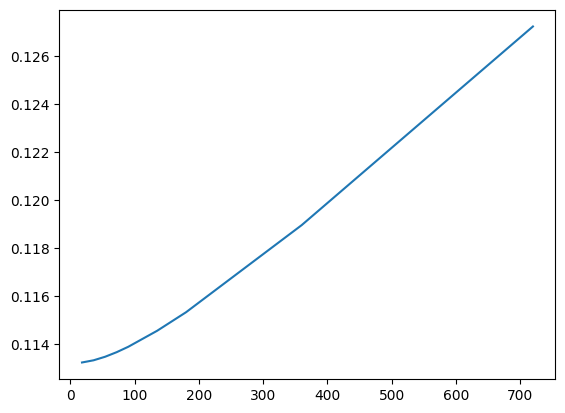

In [1020]:
plt.plot(alphas, mses)

Method 3 Lasso Regression

In [1021]:
# Here we produce results for alpha=0.05 which corresponds to lambda=0.1 in Hull's book
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-0.000034
LotArea,0.042935
OverallQual,0.298369
OverallCond,0.0
YearBuilt,0.052149
YearRemodAdd,0.06484
BsmtFinSF1,0.116008
BsmtUnfSF,-0.0
TotalBsmtSF,0.103082


### Lasso Regression Results

In [1022]:
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses=[]
r2s = []

for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred=lasso.predict(X_val)
    r2s.append(r2(y_val, pred))
    mses.append(mse(y_val,pred))

for i in mses:
    print("MSE: " + str(i))

print("\n")

for i in r2s:
    print("R2: " + str(i))

MSE: 0.11280503795073957
MSE: 0.11282086377597512
MSE: 0.11414729040993453
MSE: 0.11659054400624551
MSE: 0.11990969572754959
MSE: 0.13012030840257105
MSE: 0.1393538965589373


R2: 0.8993886136701408
R2: 0.8993744985362275
R2: 0.8981914518839514
R2: 0.8960123015911462
R2: 0.8930519333116251
R2: 0.883945036003016
R2: 0.8757095518252911


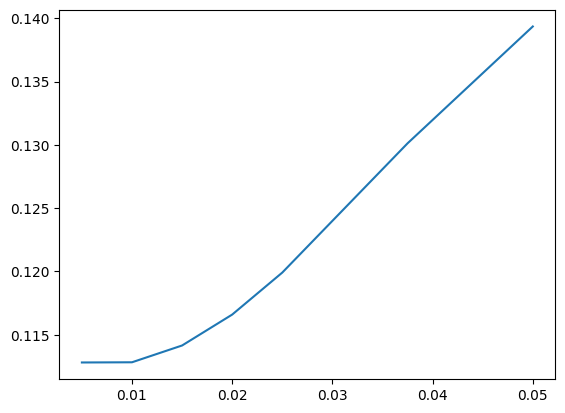

In [1023]:
plt.plot(alphas, mses)

Resetting Data

In [1024]:
lot_frontage = full_data[['LotFrontage']]

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(lot_frontage)
lot_frontage = imp.transform(lot_frontage)
lot_frontage = pd.DataFrame(lot_frontage)
print(lot_frontage.head(10))

lot_frontage = (lot_frontage - lot_frontage.mean())/lot_frontage.std()

print("Size of the dataset (row, col): ", lot_frontage.shape)
print("\nFirst 10 rows\n", lot_frontage.head(n=10))

           0
0  65.000000
1  80.000000
2  68.000000
3  60.000000
4  84.000000
5  85.000000
6  75.000000
7  69.083815
8  51.000000
9  50.000000
Size of the dataset (row, col):  (2908, 1)

First 10 rows
           0
0 -0.197213
1  0.527158
2 -0.052339
3 -0.438670
4  0.720324
5  0.768615
6  0.285701
7  0.000000
8 -0.873293
9 -0.921585


Giving LotShape Values. Reg = 0, IR1 = 1, IR2 = 2, IR3 = 3

In [1025]:
new_lot_shape = []

for value in lot_shape['LotShape']:
    if value == 'Reg':
        new_lot_shape.append(0)
    elif value == 'IR1':
        new_lot_shape.append(1)
    elif value == 'IR2':
        new_lot_shape.append(2)
    elif value == 'IR3':
        new_lot_shape.append(3)

#new_lot_shape = np.array(new_lot_shape)
lot_shape = pd.DataFrame({'LotShape': new_lot_shape})
print(lot_shape)

      LotShape
0            0
1            0
2            1
3            1
4            1
...        ...
2903         0
2904         0
2905         0
2906         0
2907         0

[2908 rows x 1 columns]


In [1026]:
lot_shape = (lot_shape - lot_shape.mean()) / lot_shape.std()
print(lot_shape)

      LotShape
0    -0.701232
1    -0.701232
2     1.058201
3     1.058201
4     1.058201
...        ...
2903 -0.701232
2904 -0.701232
2905 -0.701232
2906 -0.701232
2907 -0.701232

[2908 rows x 1 columns]


In [1027]:
scaled_data['LotShape'] = lot_shape

train = scaled_data[:1800]
val = scaled_data[1800:2400]

X_train, X_val = train.drop('Sale Price', axis=1), val.drop('Sale Price', axis=1)
y_train, y_val = train[['Sale Price']], val[['Sale Price']] 

Linear Regression

In [1028]:
lr=LinearRegression()
lr.fit(X_train,y_train)

coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-0.000323
LotArea,0.069429
OverallQual,0.212792
OverallCond,0.097124
YearBuilt,0.164766
YearRemodAdd,0.027101
BsmtFinSF1,0.092344
BsmtUnfSF,-0.033028
TotalBsmtSF,0.14078


### Linear Regression Results

In [1029]:
pred=lr.predict(X_val)
print("MSE: " + str(mse(y_val, pred)) + "\n")
print("R2: " + str(r2(y_val, pred)))

MSE: 0.11341357305866548

R2: 0.8988458581163902


Ridge Regression

In [1030]:
alphas=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses=[]
r2s = []
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    pred=ridge.predict(X_val)
    r2s.append(r2(y_val, pred))
    mses.append(mse(y_val,pred))

for i in mses:
    print("MSE: " + str(i))

print("\n")

for i in r2s:
    print("R2: " + str(i))

MSE: 0.11343601004907636
MSE: 0.11353086751342857
MSE: 0.1136818287707932
MSE: 0.11387527496349073
MSE: 0.11410176262001277
MSE: 0.11477293405137155
MSE: 0.11554793351500976
MSE: 0.11917808292077567
MSE: 0.12743309007986037


R2: 0.8988258464506763
R2: 0.8987412425964019
R2: 0.8986065994841661
R2: 0.8984340638423092
R2: 0.8982320583510364
R2: 0.8976334371422612
R2: 0.8969422111841122
R2: 0.8937044624901388
R2: 0.8863417796744909


### Ridge Regression Results

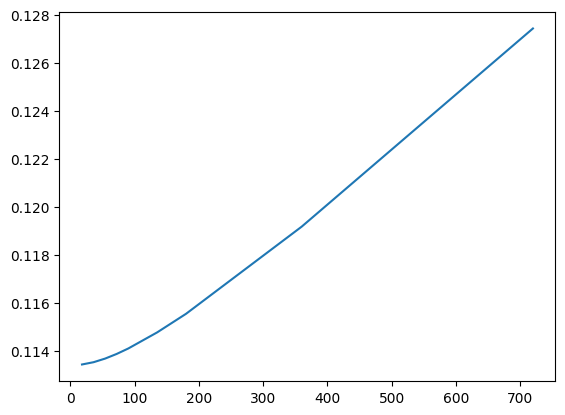

In [1031]:
plt.plot(alphas, mses)

Lasso Regression

In [1032]:
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-0.000034
LotArea,0.042935
OverallQual,0.298369
OverallCond,0.0
YearBuilt,0.052149
YearRemodAdd,0.06484
BsmtFinSF1,0.116008
BsmtUnfSF,-0.0
TotalBsmtSF,0.103082


### Lasso Regression Results

In [1033]:
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses=[]
r2s = []

for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred=lasso.predict(X_val)
    r2s.append(r2(y_val, pred))
    mses.append(mse(y_val,pred))

for i in mses:
    print("MSE: " + str(i))

print("\n")

for i in r2s:
    print("R2: " + str(i))

MSE: 0.11299539697574248
MSE: 0.11300797960169144
MSE: 0.11433822664068463
MSE: 0.11673056591285345
MSE: 0.12000314926588061
MSE: 0.13012030840257105
MSE: 0.1393538965589373


R2: 0.8992188314888316
R2: 0.8992076089808356
R2: 0.8980211548899044
R2: 0.8958874153414157
R2: 0.8929685816261
R2: 0.883945036003016
R2: 0.8757095518252911


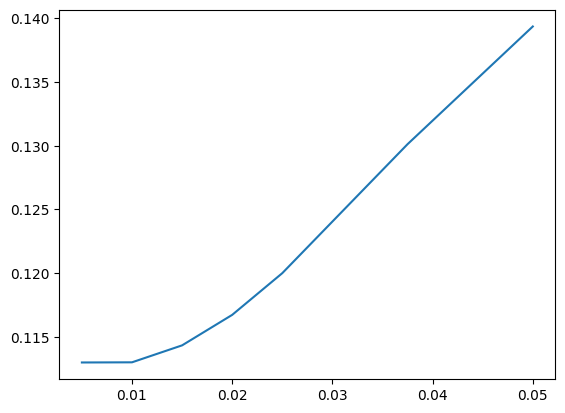

In [1034]:
plt.plot(alphas, mses)

Overall Qual and Year built
